In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
d1 = pd.read_csv('/content/aardy-1.csv')
d1.head()

,Unnamed: 0,Title,Body,Stars,Rated,Date Posted,Time Posted,Name,userId,Clean_Text_Body
0,0,Excellent service,Excellent service. I had a really good experie...,5,Excellent,3/15/2021,20:13:18+0,Varun,6,excellent service good experience
1,1,The best 😁😉,-,5,Excellent,3/15/2021,16:29:14+0,Maja Šitum,6,NaN
2,2,Excellent service!,-,5,Excellent,3/13/2021,23:48:45+0,Eugen Tseng,6,NaN
3,3,A VERY valuable employee....,I called your number and was assisted by Tina ...,5,Excellent,3/13/2021,16:51:17+0,Maurice Maurizi,6,call number assist tina help identify policy c...
4,4,Great service!!!,-,5,Excellent,3/13/2021,15:19:48+0,Hristian Anchev,6,NaN


In [3]:
filename = '/content/roamright-1.csv'
d2 = pd.read_csv(filename, sep = ',', encoding = 'latin1', error_bad_lines=False)
d2.head()

,Unnamed: 0,Title,Body,Stars,Rated,Date Posted,Time Posted,Name,userId,Clean_Text_Body
0,0,Very pleasant and efficient,Very pleasant and efficient reinstatement of p...,5,Excellent,3/9/2021,18:22:14+0,Susan,6,pleasant efficient reinstatement policy previo...
1,1,Please pay my claim.,When I was booking the insurance customer serv...,2,Poor,3/9/2021,15:08:27+0,H Shamah,6,book insurance customer service supportive dra...
2,2,DO NOT USE THIS SERVICE,"This is the slowest, most useless service. Hor...",1,Bad,3/3/2021,22:27:19+0,Anonymous,6,slow useless service horrible customer service...
3,3,I have not had a claim so I cannot tell,I have not had a claim so I cannot tell you ho...,5,Excellent,3/2/2021,12:03:51+0,steven drobnis,6,claim tell good service area far issue contrac...
4,4,Ive always had good service with,Ive always had good service with RoamRight bu...,5,Excellent,3/1/2021,17:19:19+0,Cathleen,6,good service roamright year extra specialthe ...


In [4]:
d3 = pd.read_csv('/content/visitorscoverage-1.csv')
d3.head()

,Unnamed: 0,Title,Body,Stars,Rated,Date Posted,Time Posted,Name,userId,Clean_Text_Body
0,0,Easy filling out forms and pretty…,Easy filling out forms and pretty painless tra...,5,Excellent,3/18/2021,01:42:32+0,customer,6,easy fill form pretty painless transaction hop...
1,1,Did I have a choice,Did I have a choice? No but since I didn’t at ...,5,Excellent,3/17/2021,04:17:59+0,Matthew Crumbley,6,choice process obtain policy easy
2,2,Easy fast simple and your covered great…,Easy fast simple and your covered great prices,5,Excellent,3/16/2021,15:55:19+0,customer,6,easy fast simple cover great price
3,3,Very simple & cost effective,-,5,Excellent,3/15/2021,21:00:26+0,customer,6,NaN
4,4,Thanks to Visitors Coverage for quick…,Thanks to Visitors Coverage for quick and easy...,5,Excellent,3/15/2021,17:00:29+0,customer,6,thanks visitor coverage quick easy way purchas...


In [5]:
data = pd.concat([d1, d2,d3], ignore_index=True, sort=False)

In [6]:
data.head()

,Unnamed: 0,Title,Body,Stars,Rated,Date Posted,Time Posted,Name,userId,Clean_Text_Body
0,0,Excellent service,Excellent service. I had a really good experie...,5,Excellent,3/15/2021,20:13:18+0,Varun,6,excellent service good experience
1,1,The best 😁😉,-,5,Excellent,3/15/2021,16:29:14+0,Maja Šitum,6,NaN
2,2,Excellent service!,-,5,Excellent,3/13/2021,23:48:45+0,Eugen Tseng,6,NaN
3,3,A VERY valuable employee....,I called your number and was assisted by Tina ...,5,Excellent,3/13/2021,16:51:17+0,Maurice Maurizi,6,call number assist tina help identify policy c...
4,4,Great service!!!,-,5,Excellent,3/13/2021,15:19:48+0,Hristian Anchev,6,NaN


In [7]:
data = data.loc[:,~data.columns.str.match("Unnamed")]

In [8]:
data.head()

,Title,Body,Stars,Rated,Date Posted,Time Posted,Name,userId,Clean_Text_Body
0,Excellent service,Excellent service. I had a really good experie...,5,Excellent,3/15/2021,20:13:18+0,Varun,6,excellent service good experience
1,The best 😁😉,-,5,Excellent,3/15/2021,16:29:14+0,Maja Šitum,6,NaN
2,Excellent service!,-,5,Excellent,3/13/2021,23:48:45+0,Eugen Tseng,6,NaN
3,A VERY valuable employee....,I called your number and was assisted by Tina ...,5,Excellent,3/13/2021,16:51:17+0,Maurice Maurizi,6,call number assist tina help identify policy c...
4,Great service!!!,-,5,Excellent,3/13/2021,15:19:48+0,Hristian Anchev,6,NaN


In [9]:
data.shape

(8180, 9)

In [10]:
print(d1.shape,'+', d2.shape,'+',d3.shape, '=>',' ',data.shape)

(5620, 10) + (1280, 10) + (1280, 10) =>   (8180, 9)


well I Removed Unnamed column so it 9 col totally

In [11]:
data.isna().sum()

Title                 0
Body                  0
Stars                 0
Rated                 0
Date Posted           0
Time Posted           0
Name                  0
userId                0
Clean_Text_Body    1108
dtype: int64

In [12]:
df= data.dropna()

In [13]:
df.isna().sum()

Title              0
Body               0
Stars              0
Rated              0
Date Posted        0
Time Posted        0
Name               0
userId             0
Clean_Text_Body    0
dtype: int64

In [14]:
df.shape

(7072, 9)

In [15]:
import plotly.offline as py
py.init_notebook_mode(connected =True)
import plotly.graph_objs as go
import plotly.tools as tls

In [16]:
all_words = df['Clean_Text_Body'].str.split(expand=True).unstack().value_counts()

In [17]:

dt = [go.Bar(
            x = all_words.index.values[2:50],
            y = all_words.values[2:50],
            marker= dict(colorscale='Jet',
                         color = all_words.values[2:100]
                        ),
            text='Word counts'
    )]

layout = go.Layout(
    title='Top 50 Word frequencies in the  ataset'
)

fig = go.Figure(data=dt, layout=layout)

py.iplot(fig, filename='basic-bar')

In [18]:
df.columns

Index(['Title', 'Body', 'Stars', 'Rated', 'Date Posted', 'Time Posted', 'Name',
       'userId', 'Clean_Text_Body'],
      dtype='object')

In [19]:
import nltk

In [20]:
for i in range(0,5):
  text = df.Clean_Text_Body.values[i]
  print(text)
  print(text.split(' '))
  print('\n')

excellent service good experience
['excellent', 'service', 'good', 'experience']


call number assist tina help identify policy cover extend complicate travel plan eager help clear thorough friendly professional reviewed quote call  day later finalize purchase pleased tina answer quickly efficiently help valuable employee tina hope treat accordingly
['call', 'number', 'assist', 'tina', 'help', 'identify', 'policy', 'cover', 'extend', 'complicate', 'travel', 'plan', 'eager', 'help', 'clear', 'thorough', 'friendly', 'professional', 'reviewed', 'quote', 'call', '', 'day', 'later', 'finalize', 'purchase', 'pleased', 'tina', 'answer', 'quickly', 'efficiently', 'help', 'valuable', 'employee', 'tina', 'hope', 'treat', 'accordingly']


best deal provide online  complain good service
['best', 'deal', 'provide', 'online', '', 'complain', 'good', 'service']


 purchase travel insurance leave costa rica week require aardy website come random google search allow compare company price coverage glanc

In [21]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
for i in range(0,5):
  first_text_list = nltk.word_tokenize(df.Clean_Text_Body.values[i])
  print(first_text_list)
  print()

['excellent', 'service', 'good', 'experience']

['call', 'number', 'assist', 'tina', 'help', 'identify', 'policy', 'cover', 'extend', 'complicate', 'travel', 'plan', 'eager', 'help', 'clear', 'thorough', 'friendly', 'professional', 'reviewed', 'quote', 'call', 'day', 'later', 'finalize', 'purchase', 'pleased', 'tina', 'answer', 'quickly', 'efficiently', 'help', 'valuable', 'employee', 'tina', 'hope', 'treat', 'accordingly']

['best', 'deal', 'provide', 'online', 'complain', 'good', 'service']

['purchase', 'travel', 'insurance', 'leave', 'costa', 'rica', 'week', 'require', 'aardy', 'website', 'come', 'random', 'google', 'search', 'allow', 'compare', 'company', 'price', 'coverage', 'glance', 'online', 'chat', 'feature', 'question', 'answer', 'later', 'call', 'main', 'number', 'email', 'send', 'gal', 'messaging', 'chat', 'feature', 'speak', 'different', 'agent', 'quickly', 'look', 'email', 'insurance', 'bid', 'answer', 'questionsshe', 'knowledgeable', 'current', 'requirement', 'travel', 

In [23]:
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
stopwords = nltk.corpus.stopwords.words('english')
len(stopwords)

179

In [25]:
first_text_list_cleaned = [word for word in first_text_list if word.lower() not in stopwords]
print(first_text_list_cleaned)
print('\n')
print("Length of original list: {0} words\n"
      "Length of list after stopwords removal: {1} words"
      .format(len(first_text_list), len(first_text_list_cleaned)))

['easy', 'quote', 'call', 'question', 'get', 'clear', 'concise', 'replt']


Length of original list: 8 words
Length of list after stopwords removal: 8 words


In [26]:
def print_top_words(model, feature_names, n_top_words):
    for index, topic in enumerate(model.components_):
        message = "\nTopic #{}:".format(index)
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1 :-1]])
        print(message)
        print("="*70)

In [27]:

from sklearn.feature_extraction.text import CountVectorizer

In [28]:
lemm = WordNetLemmatizer()
class LemmaCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(LemmaCountVectorizer, self).build_analyzer()
        return lambda doc: (lemm.lemmatize(w) for w in analyzer(doc))

In [29]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [30]:
text = list(df['Clean_Text_Body'].values)
# Calling our overwritten Count vectorizer
tf_vectorizer = LemmaCountVectorizer(max_df=0.95, 
                                     min_df=2,
                                     stop_words='english',
                                     decode_error='ignore')
tf = tf_vectorizer.fit_transform(text)

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

In [32]:
lda = LatentDirichletAllocation(n_components=11, max_iter=5,
                                learning_method = 'online',
                                learning_offset = 50.,
                                random_state = 0)

In [33]:
lda.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=50.0,
                          max_doc_update_iter=100, max_iter=5,
                          mean_change_tol=0.001, n_components=11, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [34]:
n_top_words = 40
print("\nTopics in LDA model: ")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)


Topics in LDA model: 

Topic #0:trip cancel new contact customer premium confidence fear roam wish company trust reach satisfied leave situation result fine deal try unable start hope print unfortunately advantage deny listen lose country appreciate africa york south discus agree uk living quarantine uncertainty

Topic #1:roamright claim service change slow year january phone right absolutely incredibly actually conversation accept long relate cause extra instead design note inform possible moment look unclear reschedule explanation th legal promptly guess worth default tell deserve announce pandemic refuse waste

Topic #2:sonia believe scotty itravel suman ngo properly sonias wound supervisor silly dial advertise thumb cool customization facet barraza haleana navigable consumer annoy sabrina initiate longer frustrating newbie signup applicable caldas honeymoon dispute instantaneous zealand adjust electronic contrast bonus covered prove

Topic #3:insurance travel policy purchase right

In [35]:
first_topic = lda.components_[0]
second_topic = lda.components_[1]
third_topic = lda.components_[2]

In [36]:
first_topic.shape

(2107,)

In [37]:
first_topic_words = [tf_feature_names[i] for i in first_topic.argsort()[:-50 - 1 :-1]]
second_topic_words = [tf_feature_names[i] for i in second_topic.argsort()[:-50 - 1 :-1]]
third_topic_words = [tf_feature_names[i] for i in third_topic.argsort()[:-50 - 1 :-1]]

In [38]:
from wordcloud import WordCloud, STOPWORDS

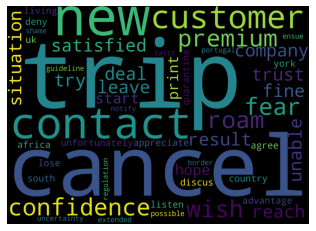

In [39]:
firstcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          width=2500,
                          height=1800
                         ).generate(" ".join(first_topic_words))
plt.imshow(firstcloud)
plt.axis('off')
plt.show()

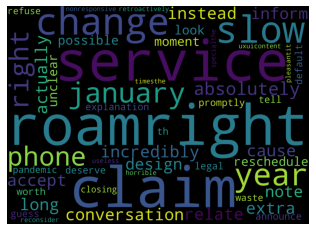

In [40]:
cloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          width=2500,
                          height=1800
                         ).generate(" ".join(second_topic_words))
plt.imshow(cloud)
plt.axis('off')
plt.show()

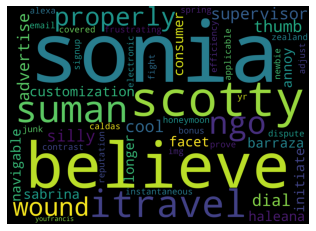

In [41]:
cloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          width=2500,
                          height=1800
                         ).generate(" ".join(third_topic_words))
plt.imshow(cloud)
plt.axis('off')
plt.show()